In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

<Axes: ylabel='job_skills'>

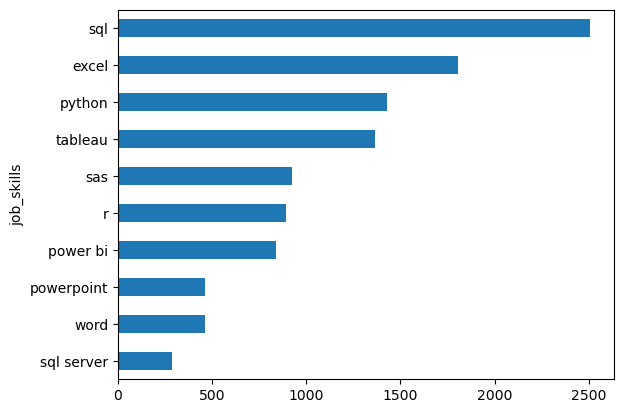

In [4]:
# top_10_most_demand_count = df_DA_US_exploded['job_skills'].value_counts().head(10)
df_DA_US_exploded['job_skills'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

In [18]:
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [ ]:
skill_stats = df_DA_US_exploded.groupby('job_skills').agg(
  median_salary=('salary_year_avg', 'median'),
  skill_count=('job_skills', 'count')
)

skill_stats

,median_salary,skill_count
job_skills,,
airflow,116250.00,44
airtable,90000.00,5
alteryx,106281.25,106
angular,107500.00,8
ansible,159640.00,1
...,...,...
wire,74250.00,4
word,81194.75,461
workfront,75000.00,3


In [11]:
top_10_highest_pay_skill_by_salary = skill_stats.sort_values(by='median_salary', ascending=False).head(10)

In [15]:
top_10_most_demand_by_count = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
top_10_most_demand_by_salary = top_10_most_demand_by_count.sort_values(by='median_salary', ascending=False)

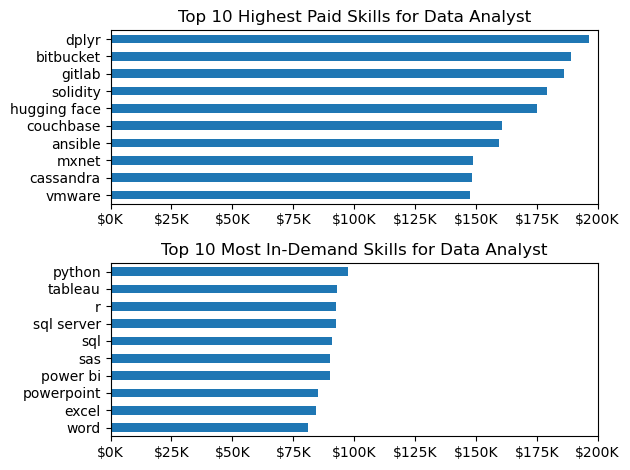

In [ ]:
fig, ax = plt.subplots(2, 1)

dict_to_view = {
  'Top 10 Highest Paid Skills for Data Analyst' : top_10_highest_pay_skill_by_salary,
  'Top 10 Most In-Demand Skills for Data Analyst' : top_10_most_demand_by_salary
  }
for i, (title, col) in enumerate(dict_to_view.items()):
  col.plot(kind='barh', y='median_salary', legend='', ax=ax[i], title=title)
  ax[i].set_ylabel('')
  ax[i].invert_yaxis()
  ax[i].set_xlim(0, 200_000)
  # ax[1].set_xlim(ax[0].get_xlim())
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
  
fig.tight_layout()

<Axes: ylabel='job_skills'>

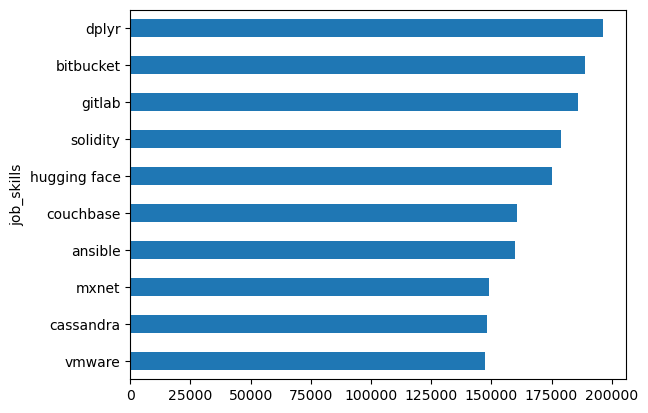

In [25]:
# top_10_highest_pay_skill_by_salary.plot(kind='barh', y='median_salary', legend='')
top_10_highest_pay_skill_by_salary[::-1].plot(kind='barh', y='median_salary', legend='') # other way to upside and down

In [ ]:
# top_10_highest_pay_skill_by_salary.plot(kind='barh', y='median_salary', legend='', ax=ax[0])
# top_10_most_demand_by_salary.plot(kind='barh', y='median_salary', legend='', ax=ax[1])
# ax[0].set_xlim(0, 200_000)
# ax[1].set_xlim(0, 200_000)
# ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

In [ ]:
# df_salary_high = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].median()
# df_salary_high = df_salary_high.reset_index(name='median_salary')
# df_salary_high.sort_values(by='median_salary', ignore_index=True).head(10).plot(kind='barh')